# Notes for Resubmission to WRR
- strip NM out of this.
- Change names to Nwt and Prov
- Add 1-2 other variables to help deduce process

In [128]:
from rhessys import snowmelt_experiment as smex
import seaborn as sns
current_palette = sns.color_palette()
import matplotlib.colors as colors
import pandas as pd

co_color = current_palette[0]
ca_color = current_palette[1]
nm_color = current_palette[2]

co_color = colors.rgb2hex(co_color)
ca_color = colors.rgb2hex(ca_color)
nm_color = colors.rgb2hex(nm_color)

In [129]:
def parse_date(df):
    return '%s-%s-%s'%(int(df.year),int(df.month),int(df.day))

### Note:
Change the function below to accept the snowmelt season start and end dates, and return just the snowmelt season indexed by day of snowmelt

In [130]:
def read_file(fl,strt,nd):
    dat = pd.read_csv(fl,sep=' ')
    dat['datetime'] = dat.apply(parse_date,axis=1)
    dat.index = pd.DatetimeIndex(dat.datetime)
    dat = dat[str(strt):str(nd)] # crop the data set
    dat['ET'] = dat.trans + dat.evap
    # add a day of snowmelt season variable
    dat['DOSM'] = np.arange(0,len(dat))
    dat.index = dat.DOSM # make the day of snowmelt the index
    
    return dat

In [131]:
def read_snowmelt(fl):
    dat = pd.read_csv(fl, sep=' ',skiprows=1,names=['year','month','day','hour','snowmelt'])
    dat['datetime'] = dat.apply(parse_date,axis=1)
    dat.index = pd.DatetimeIndex(dat.datetime)
    dat.snowmelt *= 1000.
    
    return dat

In [140]:
res = pd.read_hdf('./data/Nr1_smex8_sen_melt.hdf')
res = res.loc[res.combo==6]
params = pd.read_pickle('./data/soil_params_multispinup_Nr1_smex8_sen.pcl')
params = params.loc[params.combo==6]
cols_to_use = params.columns.difference(res.columns)
co = pd.merge(res,params[cols_to_use],left_index=True,right_index=True,how='outer')

In [141]:
res.head()

,MAP,PeakSWE,SMR,TpeakSWE,combo,idx,rd,ref,scenidx,sd,...,rz_storage,rz_drainage,unsat_storage,unsat_drainage,sat_def,sat_def_z,sm,gwStore,gwFlux,ETRate
5,6.165935,0.413660,0.007447,180.0,6,0,0.376446,2010,5,4.376446,...,173.328655,0.027733,4638.340055,0.0,5478.91344,4376.446,17.742263,8.563402,0.002916,0.495071
20,6.178629,0.423372,0.017967,202.0,6,1,0.376446,2010,20,4.376446,...,173.086402,0.000000,4638.183938,0.0,5478.91344,4376.446,0.000000,1.028522,0.001397,0.477338
35,6.099164,0.470056,0.014164,236.0,6,2,0.376446,2010,35,4.376446,...,173.825607,0.244400,4730.125507,0.0,5478.91344,4376.446,208.393962,847.656039,0.780633,1.818940
50,6.165935,0.478686,0.013006,198.0,6,3,0.376446,2010,50,4.376446,...,173.209117,0.041600,4638.225538,0.0,5478.91344,4376.446,8.370619,3.220856,0.001334,0.407723
65,6.099164,0.410855,0.014850,235.0,6,4,0.376446,2010,65,4.376446,...,174.214670,0.343739,4721.271371,0.0,5478.91344,4376.446,216.554944,701.999576,0.769623,2.195554


In [142]:
res = pd.read_hdf('./data/P301_smex8_sen_melt.hdf')
res = res.loc[res.combo==6]
params = pd.read_pickle('./data/soil_params_multispinup_P301_smex8_sen.pcl')
params = params.loc[params.combo==6]
cols_to_use = params.columns.difference(res.columns)
ca = pd.merge(res,params[cols_to_use],left_index=True,right_index=True,how='outer')

In [143]:
params.head()

,MAP,PeakSWE,SMR,TpeakSWE,combo,idx,rd,ref,scenidx,sd
5,0.325,0.521211,0.014403,113.0,6,0,1.110408,2009,5,5.110408
20,0.041,1.328189,0.014842,177.0,6,1,1.110408,2009,20,5.110408
35,0.041,0.940332,0.009731,192.0,6,2,1.110408,2009,35,5.110408
50,0.081,0.779654,0.007164,116.0,6,3,1.110408,2009,50,5.110408
65,0.041,0.593449,0.004957,151.0,6,4,1.110408,2009,65,5.110408


In [144]:
co['Tnosnow'] = co.TpeakSWE+np.ceil(co.PeakSWE/co.SMR)
ca['Tnosnow'] = ca.TpeakSWE+np.ceil(ca.PeakSWE/ca.SMR)

In [145]:
co.head()

,MAP,PeakSWE,SMR,TpeakSWE,combo,idx,rd,ref,scenidx,sd,...,rz_drainage,unsat_storage,unsat_drainage,sat_def,sat_def_z,sm,gwStore,gwFlux,ETRate,Tnosnow
5,6.165935,0.413660,0.007447,180.0,6,0,0.376446,2010,5,4.376446,...,0.027733,4638.340055,0.0,5478.91344,4376.446,17.742263,8.563402,0.002916,0.495071,236.0
20,6.178629,0.423372,0.017967,202.0,6,1,0.376446,2010,20,4.376446,...,0.000000,4638.183938,0.0,5478.91344,4376.446,0.000000,1.028522,0.001397,0.477338,226.0
35,6.099164,0.470056,0.014164,236.0,6,2,0.376446,2010,35,4.376446,...,0.244400,4730.125507,0.0,5478.91344,4376.446,208.393962,847.656039,0.780633,1.818940,270.0
50,6.165935,0.478686,0.013006,198.0,6,3,0.376446,2010,50,4.376446,...,0.041600,4638.225538,0.0,5478.91344,4376.446,8.370619,3.220856,0.001334,0.407723,235.0
65,6.099164,0.410855,0.014850,235.0,6,4,0.376446,2010,65,4.376446,...,0.343739,4721.271371,0.0,5478.91344,4376.446,216.554944,701.999576,0.769623,2.195554,263.0


In [146]:
co['date_peakSWE'] = co.apply(smex.DOPEAKSWE2cal,axis=1)
co['date_ONS'] = co.apply(smex.DONS2cal,axis=1)

ca['date_peakSWE'] = ca.apply(smex.DOPEAKSWE2cal,axis=1)
ca['date_ONS'] = ca.apply(smex.DONS2cal,axis=1)

In [147]:
# get the scenario index values
# slow snowmelt
tmp = co.loc[(co.PeakSWE>np.percentile(co.PeakSWE,45)) & (co.PeakSWE<np.percentile(co.PeakSWE,55)) & (co.SMR<np.percentile(co.SMR,10))]
co_slowearly = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].scenidx.values[0]
co_slowlate = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].scenidx.values[0]

tmp = ca.loc[(ca.PeakSWE>np.percentile(ca.PeakSWE,45)) & (ca.PeakSWE<np.percentile(ca.PeakSWE,55)) & (ca.SMR<np.percentile(ca.SMR,10))]
ca_slowearly = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].scenidx.values[0]
ca_slowlate = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].scenidx.values[0]

# medium snowmelt
tmp = co.loc[(co.PeakSWE>np.percentile(co.PeakSWE,45)) & (co.PeakSWE<np.percentile(co.PeakSWE,55)) & (co.SMR>np.percentile(co.SMR,45)) & (co.SMR<np.percentile(co.SMR,55))]
co_medearly = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].scenidx.values[0]
co_medlate = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].scenidx.values[0]

tmp = ca.loc[(ca.PeakSWE>np.percentile(ca.PeakSWE,45)) & (ca.PeakSWE<np.percentile(ca.PeakSWE,55)) & (ca.SMR>np.percentile(ca.SMR,45)) & (ca.SMR<np.percentile(ca.SMR,55))]
ca_medearly = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].scenidx.values[0]
ca_medlate = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].scenidx.values[0]

# fast snowmelt
tmp = co.loc[(co.PeakSWE>np.percentile(co.PeakSWE,45)) & (co.PeakSWE<np.percentile(co.PeakSWE,55)) & (co.SMR>np.percentile(co.SMR,90))]
co_fastearly = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].scenidx.values[0]
co_fastlate = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].scenidx.values[0]

tmp = ca.loc[(ca.PeakSWE>np.percentile(ca.PeakSWE,45)) & (ca.PeakSWE<np.percentile(ca.PeakSWE,55)) & (ca.SMR>np.percentile(ca.SMR,90))]
ca_fastearly = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].scenidx.values[0]
ca_fastlate = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].scenidx.values[0]

In [152]:
print 'CO'
print 'Slow, early: %s'%co_slowearly
print 'Slow, late: %s'%co_slowlate
print 'Medium, early: %s'%co_medearly
print 'Medium, late: %s'%co_medlate
print 'Fast, early: %s'%co_fastearly
print 'Fast, late: %s'%co_fastlate

print 'CA'
print 'Slow, early: %s'%ca_slowearly
print 'Slow, late: %s'%ca_slowlate
print 'Medium, early: %s'%ca_medearly
print 'Medium, late: %s'%ca_medlate
print 'Fast, early: %s'%ca_fastearly
print 'Fast, late: %s'%ca_fastlate

CO
Slow, early: 32915
Slow, late: 1610
Medium, early: 130490
Medium, late: 119765
Fast, early: 124460
Fast, late: 105485
CA
Slow, early: 149900
Slow, late: 34985
Medium, early: 42800
Medium, late: 92630
Fast, early: 143570
Fast, late: 15725


In [153]:
site = 'Nr1'
exname = 'smex8_sen'
method = '8'
period = 'full'
coAll = pd.read_hdf('./data/%s_%s_%s_processed_for_SA.h5'%(site,exname,period),'df')
period = 'melt'
coSM = pd.read_hdf('./data/%s_%s_%s_processed_for_SA.h5'%(site,exname,period),'df')

site = 'p301'
exname = 'smex8_sen'
method = '8'
period = 'full'
caAll = pd.read_hdf('./data/%s_%s_%s_processed_for_SA.h5'%(site,exname,period),'df')
period = 'melt'
caSM = pd.read_hdf('./data/%s_%s_%s_processed_for_SA.h5'%(site,exname,period),'df')

In [154]:
# build one dataframe for pie charts

dfsAll = []
dfsSM = []

scens = [co_slowearly, co_slowlate, co_medearly, co_medlate, co_fastearly,
         co_fastlate, ca_slowearly, ca_slowlate, ca_medearly, ca_medlate, ca_fastearly, ca_fastlate]
sites = ['Nr1','Nr1','Nr1','Nr1','Nr1','Nr1',
        'P301','P301','P301','P301','P301','P301']
rates = ['slow', 'slow', 'med', 'med', 'fast','fast',
                'slow', 'slow', 'med', 'med', 'fast','fast']
timings = ['early', 'late', 'early', 'late', 'early','late',
                'early', 'late', 'early', 'late', 'early','late']
for scenidx,site,rate,timing in zip(scens,sites,rates,timings):
    print '%s %s %s'%(site, des, scenidx)
    if site == 'Nr1':
        # entire water year
        tmp = coAll.loc[coAll.scenidx == scenidx].copy()
        tmp['site'] = site
        tmp['rate'] = rate
        tmp['timing'] = timing
        tmp['name'] = '%s_%s'%(site,des)
        assert len(tmp) == 1
        dfsAll.append(tmp)
        
        # snowmelt season
        tmp = coSM.loc[coSM.scenidx == scenidx].copy()
        tmp['site'] = site
        tmp['rate'] = rate
        tmp['timing'] = timing
        tmp['name'] = '%s_%s'%(site,des)
        assert len(tmp) == 1
        dfsSM.append(tmp)
        
    if site == 'P301':
        # entire water year
        tmp = caAll.loc[caAll.scenidx == scenidx].copy()
        tmp['site'] = site
        tmp['rate'] = rate
        tmp['timing'] = timing
        tmp['name'] = '%s_%s'%(site,des)
        assert len(tmp) == 1
        dfsAll.append(tmp)
        
        # snowmelt season
        tmp = caSM.loc[caSM.scenidx == scenidx].copy()
        tmp['site'] = site
        tmp['rate'] = rate
        tmp['timing'] = timing
        tmp['name'] = '%s_%s'%(site,des)
        assert len(tmp) == 1
        dfsSM.append(tmp)
        
wy = pd.concat(dfsAll)
sm = pd.concat(dfsSM)

Nr1 fastlate 32915
Nr1 fastlate 1610
Nr1 fastlate 130490
Nr1 fastlate 119765
Nr1 fastlate 124460
Nr1 fastlate 105485
P301 fastlate 149900
P301 fastlate 34985
P301 fastlate 42800
P301 fastlate 92630
P301 fastlate 143570
P301 fastlate 15725


In [155]:
sm.columns

Index([              u'MAP',           u'PeakSWE',               u'SMR',
                u'TpeakSWE',             u'combo',               u'idx',
                      u'rd',               u'ref',           u'scenidx',
                      u'sd',                 u'T',                 u'E',
                      u'ET',                 u'Q',               u'Qbf',
                     u'Qrf',              u'rech',               u'sat',
                       u'p',        u'rz_storage',       u'rz_drainage',
           u'unsat_storage',    u'unsat_drainage',           u'sat_def',
               u'sat_def_z',                u'sm',           u'gwStore',
                  u'gwFlux',            u'ETRate',            u'Pmodel',
                     u'Pex',                u'wb',        u'wb_PeakSWE',
               u'E_PeakSWE',         u'T_PeakSWE',                u'RR',
                   u'ablRR',             u'RR_ET',          u'ablRR_ET',
             u'SMR_PeakSWE',  u'TpeakSWE_PeakSWE', 

In [159]:
# for new table 6
sm[['site','rate','timing','wb','ET','E','T','RR_ET','gwStore','unsat_storage','rz_storage']].round(0)

,site,rate,timing,wb,ET,E,T,RR_ET,gwStore,unsat_storage,rz_storage
32915,Nr1,slow,early,351.0,29.0,27.0,2.0,1.0,4.0,4638.0,173.0
1610,Nr1,slow,late,260.0,60.0,1.0,59.0,1.0,1260.0,4745.0,173.0
130490,Nr1,med,early,335.0,14.0,12.0,2.0,1.0,3.0,4638.0,174.0
119765,Nr1,med,late,281.0,64.0,1.0,63.0,1.0,767.0,4727.0,174.0
124460,Nr1,fast,early,369.0,11.0,9.0,2.0,1.0,2.0,4638.0,174.0
105485,Nr1,fast,late,273.0,57.0,2.0,55.0,1.0,527.0,4721.0,174.0
149900,P301,slow,early,319.0,236.0,22.0,214.0,1.0,4339.0,2770.0,321.0
34985,P301,slow,late,-100.0,321.0,16.0,304.0,0.0,7048.0,2770.0,377.0
42800,P301,med,early,582.0,35.0,9.0,26.0,1.0,1964.0,2770.0,344.0
92630,P301,med,late,196.0,132.0,6.0,126.0,1.0,4178.0,2770.0,450.0


In [124]:
wy[['site','rate','timing','wb','ET','evap','trans','RR_ET']]

,site,rate,timing,wb,ET,evap,trans,RR_ET
54862,Nr1,slow,early,-114.708216,282.774566,188.499798,94.274768,0.956798
2687,Nr1,slow,late,-218.519542,327.611610,201.323949,126.287661,0.948504
217487,Nr1,med,early,-279.612402,355.466005,213.781408,141.684597,0.946566
199612,Nr1,med,late,-292.872861,379.434500,222.967328,156.467172,0.941338
207437,Nr1,fast,early,-272.237076,370.409969,221.917436,148.492533,0.944771
175812,Nr1,fast,late,-317.538617,381.881065,225.234906,156.646159,0.940779
249837,P301,slow,early,9.824297,544.262159,86.553644,457.708515,0.138344
58312,P301,slow,late,-73.882291,570.541337,113.547395,456.993942,0.085125
71337,P301,med,early,37.559452,558.876085,103.330070,455.546015,0.368534
154387,P301,med,late,-51.186417,570.541337,113.547395,456.993942,0.117252


In [69]:
sites

array(['Nr1', 'P301'], dtype=object)

In [70]:
rates

array(['slow', 'med', 'fast'], dtype=object)

In [71]:
sm

,MAP,PeakSWE,SMR,TpeakSWE,combo,idx,ksat,m,pa,po,...,SMR2,PeakSWE2,TpeakSWE2,SMR_PeakSWE2,TpeakSWE_PeakSWE2,wb2,site,rate,timing,name
54862,6165.934875,379.459937,5.660642,163.0,d3:s3,2194,20.049,4.9592,0.007120,0.032637,...,-1.404902,0.134259,-1.664316,-1.170142,-1.170142,0.300117,Nr1,slow,early,Nr1_fastlate
2687,6000.664315,361.212271,4.952568,237.0,d3:s3,107,20.049,4.9592,0.007120,0.032637,...,-1.560737,-0.043370,1.704164,-1.237614,-1.237614,-1.244734,Nr1,slow,late,Nr1_fastlate
217487,6303.731296,348.641020,11.358300,163.0,d3:s3,8699,20.049,4.9592,0.007120,0.032637,...,-0.150952,-0.165743,-1.664316,-0.182603,-0.182603,0.217749,Nr1,med,early,Nr1_fastlate
199612,6099.164315,368.942060,12.440059,236.0,d3:s3,7984,20.049,4.9592,0.007120,0.032637,...,0.087124,0.031875,1.658644,-0.118892,-0.118892,-0.671232,Nr1,med,late,Nr1_fastlate
207437,6327.436563,379.329486,18.967391,162.0,d3:s3,8297,20.049,4.9592,0.007120,0.032637,...,1.523671,0.132989,-1.709836,0.791654,0.791654,0.600874,Nr1,fast,early,Nr1_fastlate
175812,6101.064315,347.328057,19.271450,238.0,d3:s3,7032,20.049,4.9592,0.007120,0.032637,...,1.590588,-0.178524,1.749684,1.098210,1.098210,-0.700018,Nr1,fast,late,Nr1_fastlate
249837,41.000000,590.646468,3.983009,108.0,d3:s3,9993,1515.780,1.2548,0.101588,0.516732,...,-1.816010,-0.133934,-1.676412,-0.411599,-0.411599,-0.395101,P301,slow,early,P301_fastlate
58312,41.000000,582.627956,5.257633,202.0,d3:s3,2332,1515.780,1.2548,0.101588,0.516732,...,-1.476201,-0.154591,1.618485,-0.382524,-0.382524,-0.760232,P301,slow,late,P301_fastlate
71337,252.000000,633.044997,11.472441,111.0,d3:s3,2853,1515.780,1.2548,0.101588,0.516732,...,0.180640,-0.024707,-1.571256,-0.266522,-0.266522,0.174138,P301,med,early,P301_fastlate
154387,41.000000,605.323830,10.665964,206.0,d3:s3,6175,1515.780,1.2548,0.101588,0.516732,...,-0.034363,-0.096122,1.758694,-0.272927,-0.272927,-0.243385,P301,med,late,P301_fastlate


In [96]:
sites = sm.site.unique()
rates = sm.rate.unique()
variables = ['T','E','wb','RR_ET','ET']

sites2 = []
rates2 = []
variables2 = []
diffs = []
for site in sites:
    for rate in rates:
        for var in variables:
            early = sm.loc[(sm.site == site) & (sm.rate == rate)][var].values[0]
            late = sm.loc[(sm.site == site) & (sm.rate == rate)][var].values[1]
            if var == 'RR_ET':
                diff = early-late
                diff = round(diff,4)
            else:
                diff = (late-early)/late
            
            sites2.append(site)
            rates2.append(rate)
            variables2.append(var)
            diffs.append(diff*100.)
    
            print '%s %s %s: %s'%(site,rate,var, early-late)
diff = pd.DataFrame()
diff['site'] = sites2
diff['rate'] = rates2
diff['variable'] = variables2
diff['value'] = diffs

Nr1 slow T: -84.209317
Nr1 slow E: 30.056877999999998
Nr1 slow wb: 154.73739587094715
Nr1 slow RR_ET: 0.008668189368147727
Nr1 slow ET: -54.152438999999994
Nr1 med T: -86.751972
Nr1 med E: 12.616678
Nr1 med wb: 89.04328207352194
Nr1 med RR_ET: 0.011537544213535034
Nr1 med ET: -74.13529399999999
Nr1 fast T: -82.69876199999999
Nr1 fast E: 6.440564
Nr1 fast wb: 130.30163987871512
Nr1 fast RR_ET: 0.011896868172772912
Nr1 fast ET: -76.258198
P301 slow T: -82.92348900000002
P301 slow E: 6.277802000000001
P301 slow wb: 123.26169224881511
P301 slow RR_ET: 0.12633833874964717
P301 slow ET: -76.64568700000007
P301 med T: -86.54860099999999
P301 med E: 3.6939860000000007
P301 med wb: 140.9481164092237
P301 med RR_ET: 0.13978015005534805
P301 med ET: -82.854615
P301 fast T: -69.83453499999999
P301 fast E: -0.07751799999999998
P301 fast wb: -6.083203414131617
P301 fast RR_ET: 0.10228440794256044
P301 fast ET: -69.91205299999999


In [97]:
diff

,site,rate,variable,value
0,Nr1,slow,T,95.196305
1,Nr1,slow,E,-2663.148335
2,Nr1,slow,wb,-86.846890
3,Nr1,slow,RR_ET,0.870000
4,Nr1,slow,ET,60.446612
5,Nr1,med,T,95.544349
6,Nr1,med,E,-1195.373577
7,Nr1,med,wb,-37.791613
8,Nr1,med,RR_ET,1.150000
9,Nr1,med,ET,80.710755


In [59]:
wy[['site','rate','timing','wb']]

,site,rate,timing,wb
54862,Nr1,slow,early,-114.708216
2687,Nr1,slow,late,-218.519542
217487,Nr1,med,early,-279.612402
199612,Nr1,med,late,-292.872861
207437,Nr1,fast,early,-272.237076
175812,Nr1,fast,late,-317.538617
249837,P301,slow,early,9.824297
58312,P301,slow,late,-73.882291
71337,P301,med,early,37.559452
154387,P301,med,late,-51.186417


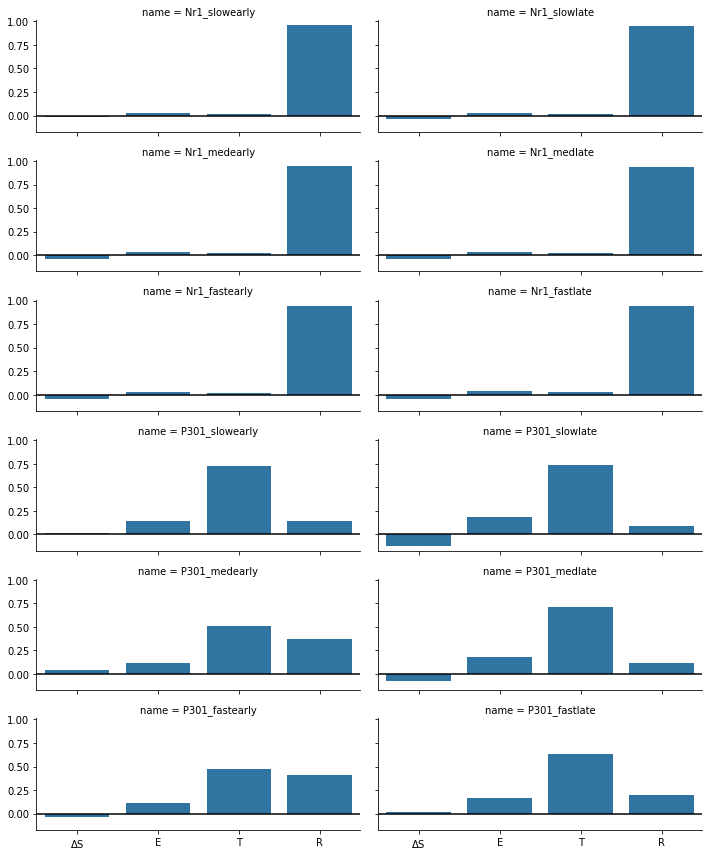

In [56]:
tmp = wy[['wb_PeakSWE','E_PeakSWE','T_PeakSWE','RR_ET','name']]
tmp.columns = ['$\Delta$S','E','T','R','name']
g = sns.FacetGrid(tmp.melt(id_vars=['name']), col = 'name', height = 2, col_wrap=2, aspect=2.5)
g.map(sns.barplot,'variable','value')
g.map(plt.axhline,y=0,c='k')

In [21]:
wy

,MAP,PeakSWE,SMR,TpeakSWE,combo,idx,ksat,m,pa,po,...,ETRate,Pmodel,Pex,wb,wb_PeakSWE,E_PeakSWE,T_PeakSWE,RR_ET,site,designation
54862,6165.934875,379.459937,5.660642,163.0,d3:s3,2194,20.049,4.9592,0.007120,0.032637,...,0.774725,849.730706,6545.394812,-114.708216,-0.017525,0.028799,0.014403,0.956798,co,slowearly
2687,6000.664315,361.212271,4.952568,237.0,d3:s3,107,20.049,4.9592,0.007120,0.032637,...,0.897566,905.161612,6361.876585,-218.519542,-0.034348,0.031645,0.019851,0.948504,co,slowlate
217487,6303.731296,348.641020,11.358300,163.0,d3:s3,8699,20.049,4.9592,0.007120,0.032637,...,0.973879,970.697293,6652.372316,-279.612402,-0.042032,0.032136,0.021298,0.946566,co,medearly
199612,6099.164315,368.942060,12.440059,236.0,d3:s3,7984,20.049,4.9592,0.007120,0.032637,...,1.039547,1020.211878,6468.106374,-292.872861,-0.045280,0.034472,0.024191,0.941338,co,medlate
207437,6327.436563,379.329486,18.967391,162.0,d3:s3,8297,20.049,4.9592,0.007120,0.032637,...,1.014822,1027.497566,6706.766049,-272.237076,-0.040591,0.033089,0.022141,0.944771,co,fastearly
175812,6101.064315,347.328057,19.271450,238.0,d3:s3,7032,20.049,4.9592,0.007120,0.032637,...,1.046249,1001.870006,6448.392372,-317.538617,-0.049243,0.034929,0.024292,0.940779,co,fastlate
249837,41.000000,590.646468,3.983009,108.0,d3:s3,9993,1515.780,1.2548,0.101588,0.516732,...,1.483003,1029.521518,631.646468,9.824297,0.015553,0.137029,0.724628,0.138344,ca,slowearly
58312,41.000000,582.627956,5.257633,202.0,d3:s3,2332,1515.780,1.2548,0.101588,0.516732,...,1.554609,1721.357206,623.627956,-73.882291,-0.118472,0.182076,0.732799,0.085125,ca,slowlate
71337,252.000000,633.044997,11.472441,111.0,d3:s3,2853,1515.780,1.2548,0.101588,0.516732,...,1.522823,1278.161997,885.044997,37.559452,0.042438,0.116751,0.514715,0.368534,ca,medearly
154387,41.000000,605.323830,10.665964,206.0,d3:s3,6175,1515.780,1.2548,0.101588,0.516732,...,1.554609,1744.053080,646.323830,-51.186417,-0.079196,0.175682,0.707067,0.117252,ca,medlate


In [16]:
coAll.head()

,MAP,PeakSWE,SMR,TpeakSWE,combo,idx,rd,ref,scenidx,sd,...,gwStore,gwFlux,ETRate,Pmodel,Pex,wb,wb_PeakSWE,E_PeakSWE,T_PeakSWE,RR_ET
0,6165.934875,413.660073,7.447322,180.0,1,0,0.003764,2010,0,4.003764,...,2083.350725,0.187478,0.618126,960.581687,6579.594948,-154.203292,-0.023437,0.034130,0.000160,0.965710
1,6165.934875,413.660073,7.447322,180.0,2,0,0.037645,2010,1,4.037645,...,2083.519092,0.187493,0.731581,960.581687,6579.594948,-154.849904,-0.023535,0.037784,0.002800,0.959416
2,6165.934875,413.660073,7.447322,180.0,3,0,0.075289,2010,2,4.075289,...,2083.787308,0.187517,0.780158,960.581687,6579.594948,-132.891755,-0.020198,0.037911,0.005368,0.956721
3,6165.934875,413.660073,7.447322,180.0,4,0,0.150578,2010,3,4.150578,...,2083.704982,0.187510,0.885977,960.581687,6579.594948,-174.333507,-0.026496,0.037971,0.011178,0.950851
4,6165.934875,413.660073,7.447322,180.0,5,0,0.301157,2010,4,4.301157,...,2083.846870,0.187523,0.857978,960.581687,6579.594948,32.052388,0.004871,0.033839,0.013757,0.952404


In [12]:
coAll.loc[coAll.scenidx == co_slowearly]

,MAP,PeakSWE,SMR,TpeakSWE,combo,idx,rd,ref,scenidx,sd,...,gwStore,gwFlux,ETRate,Pmodel,Pex,wb,wb_PeakSWE,E_PeakSWE,T_PeakSWE,RR_ET
54862,6319.254423,313.509374,15.41934,166.0,8,3657,1.505784,2010,54862,5.505784,...,2503.849876,0.225295,1.404449,959.150512,6632.763796,-281.347131,-0.042418,0.038765,0.038522,0.922713


In [13]:
# compute start and stop dates
# slow snowmelt
tmp = co.loc[(co.PeakSWE>np.percentile(co.PeakSWE,45)) & (co.PeakSWE<np.percentile(co.PeakSWE,55)) & (co.SMR<np.percentile(co.SMR,10))]
co_slowearly_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_peakSWE.as_matrix()[0]
co_slowearly_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_ONS.as_matrix()[0]

co_slowlate_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_peakSWE.as_matrix()[0]
co_slowlate_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_ONS.as_matrix()[0]

co_slow_strt = np.max([co_slowearly_strt,co_slowlate_strt])
co_slow_nd = np.min([co_slowearly_nd,co_slowlate_nd])

tmp = ca.loc[(ca.PeakSWE>np.percentile(ca.PeakSWE,45)) & (ca.PeakSWE<np.percentile(ca.PeakSWE,55)) & (ca.SMR<np.percentile(ca.SMR,10))]
ca_slowearly_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_peakSWE.as_matrix()[0]
ca_slowearly_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_ONS.as_matrix()[0]

ca_slowlate_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_peakSWE.as_matrix()[0]
ca_slowlate_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_ONS.as_matrix()[0]

ca_slow_strt = np.max([ca_slowearly_strt,ca_slowlate_strt])
ca_slow_nd = np.min([ca_slowearly_nd,ca_slowlate_nd])

# medium snowmelt
tmp = co.loc[(co.PeakSWE>np.percentile(co.PeakSWE,45)) & (co.PeakSWE<np.percentile(co.PeakSWE,55)) & (co.SMR>np.percentile(co.SMR,45)) & (co.SMR<np.percentile(co.SMR,55))]
co_medearly_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_peakSWE.as_matrix()[0]
co_medearly_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_ONS.as_matrix()[0]

co_medlate_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_peakSWE.as_matrix()[0]
co_medlate_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_ONS.as_matrix()[0]

co_med_strt = np.max([co_medearly_strt,co_medlate_strt])
co_med_nd = np.min([co_medearly_nd,co_medlate_nd])

tmp = ca.loc[(ca.PeakSWE>np.percentile(ca.PeakSWE,45)) & (ca.PeakSWE<np.percentile(ca.PeakSWE,55)) & (ca.SMR>np.percentile(ca.SMR,45)) & (ca.SMR<np.percentile(ca.SMR,55))]
ca_medearly_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_peakSWE.as_matrix()[0]
ca_medearly_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_ONS.as_matrix()[0]

ca_medlate_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_peakSWE.as_matrix()[0]
ca_medlate_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_ONS.as_matrix()[0]

ca_med_strt = np.max([ca_medearly_strt,ca_medlate_strt])
ca_med_nd = np.min([ca_medearly_nd,ca_medlate_nd])

# fast snowmelt
tmp = co.loc[(co.PeakSWE>np.percentile(co.PeakSWE,45)) & (co.PeakSWE<np.percentile(co.PeakSWE,55)) & (co.SMR>np.percentile(co.SMR,90))]
co_fastearly_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_peakSWE.as_matrix()[0]
co_fastearly_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_ONS.as_matrix()[0]

co_fastlate_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_peakSWE.as_matrix()[0]
co_fastlate_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_ONS.as_matrix()[0]

co_fast_strt = np.max([co_fastearly_strt,co_fastlate_strt])
co_fast_nd = np.min([co_fastearly_nd,co_fastlate_nd])

tmp = ca.loc[(ca.PeakSWE>np.percentile(ca.PeakSWE,45)) & (ca.PeakSWE<np.percentile(ca.PeakSWE,55)) & (ca.SMR>np.percentile(ca.SMR,90))]
ca_fastearly_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_peakSWE.as_matrix()[0]
ca_fastearly_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_ONS.as_matrix()[0]

ca_fastlate_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_peakSWE.as_matrix()[0]
ca_fastlate_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_ONS.as_matrix()[0]

ca_fast_strt = np.max([ca_fastearly_strt,ca_fastlate_strt])
ca_fast_nd = np.min([ca_fastearly_nd,ca_fastlate_nd])


In [14]:
# load the files, subset them, merge to one data frame per snowmelt rate class
co_slowearly = read_file(co_slowearly,co_slowearly_strt,co_slowearly_nd)[['ET','streamflow']]
co_slowlate = read_file(co_slowlate,co_slowlate_strt,co_slowlate_nd)[['ET','streamflow']]

co_slow = pd.merge(left=co_slowearly,right=co_slowlate,how='inner',left_index=True,right_index=True)
co_slow['diff'] = co_slow.ET_y - co_slow.ET_x # late - early snowmelt

co_medearly = read_file(co_medearly,co_medearly_strt,co_medearly_nd)[['ET','streamflow']]
co_medlate = read_file(co_medlate,co_medlate_strt,co_medlate_nd)[['ET','streamflow']]

co_med = pd.merge(left=co_medearly,right=co_medlate,how='inner',left_index=True,right_index=True)
co_med['diff'] = co_med.ET_y - co_med.ET_x # late - early snowmelt

co_fastearly = read_file(co_fastearly,co_fastearly_strt,co_fastearly_nd)[['ET','streamflow']]
co_fastlate = read_file(co_fastlate,co_fastlate_strt,co_fastlate_nd)[['ET','streamflow']]

co_fast = pd.merge(left=co_fastearly,right=co_fastlate,how='inner',left_index=True,right_index=True)
co_fast['diff'] = co_fast.ET_y - co_fast.ET_x # late - early snowmelt

# load the files, subset them, merge to one data frame per snowmelt rate class
ca_slowearly = read_file(ca_slowearly,ca_slowearly_strt,ca_slowearly_nd)[['ET','streamflow']]
ca_slowlate = read_file(ca_slowlate,ca_slowlate_strt,ca_slowlate_nd)[['ET','streamflow']]

ca_slow = pd.merge(left=ca_slowearly,right=ca_slowlate,how='inner',left_index=True,right_index=True)
ca_slow['diff'] = ca_slow.ET_y - ca_slow.ET_x # late - early snowmelt

ca_medearly = read_file(ca_medearly,ca_medearly_strt,ca_medearly_nd)[['ET','streamflow']]
ca_medlate = read_file(ca_medlate,ca_medlate_strt,ca_medlate_nd)[['ET','streamflow']]

ca_med = pd.merge(left=ca_medearly,right=ca_medlate,how='inner',left_index=True,right_index=True)
ca_med['diff'] = ca_med.ET_y - ca_med.ET_x # late - early snowmelt

ca_fastearly = read_file(ca_fastearly,ca_fastearly_strt,ca_fastearly_nd)[['ET','streamflow']]
ca_fastlate = read_file(ca_fastlate,ca_fastlate_strt,ca_fastlate_nd)[['ET','streamflow']]

ca_fast = pd.merge(left=ca_fastearly,right=ca_fastlate,how='inner',left_index=True,right_index=True)
ca_fast['diff'] = ca_fast.ET_y - ca_fast.ET_x # late - early snowmelt

# load the files, subset them, merge to one data frame per snowmelt rate class
nm_slowearly = read_file(nm_slowearly,nm_slowearly_strt,nm_slowearly_nd)[['ET','streamflow']]
nm_slowlate = read_file(nm_slowlate,nm_slowlate_strt,nm_slowlate_nd)[['ET','streamflow']]

nm_slow = pd.merge(left=nm_slowearly,right=nm_slowlate,how='inner',left_index=True,right_index=True)
nm_slow['diff'] = nm_slow.ET_y - nm_slow.ET_x # late - early snowmelt

nm_medearly = read_file(nm_medearly,nm_medearly_strt,nm_medearly_nd)[['ET','streamflow']]
nm_medlate = read_file(nm_medlate,nm_medlate_strt,nm_medlate_nd)[['ET','streamflow']]

nm_med = pd.merge(left=nm_medearly,right=nm_medlate,how='inner',left_index=True,right_index=True)
nm_med['diff'] = nm_med.ET_y - nm_med.ET_x # late - early snowmelt

nm_fastearly = read_file(nm_fastearly,nm_fastearly_strt,nm_fastearly_nd)[['ET','streamflow']]
nm_fastlate = read_file(nm_fastlate,nm_fastlate_strt,nm_fastlate_nd)[['ET','streamflow']]

nm_fast = pd.merge(left=nm_fastearly,right=nm_fastlate,how='inner',left_index=True,right_index=True)
nm_fast['diff'] = nm_fast.ET_y - nm_fast.ET_x # late - early snowmelt

In [27]:
print co_slow.filter(regex='ET*').sum().round()
print co_med.filter(regex='ET*').sum().round()
print co_fast.filter(regex='ET*').sum().round()

ET_x    35.0
ET_y    90.0
dtype: float64
ET_x    16.0
ET_y    92.0
dtype: float64
ET_x    10.0
ET_y    87.0
dtype: float64


In [28]:
print ca_slow.filter(regex='ET*').sum().round()
print ca_med.filter(regex='ET*').sum().round()
print ca_fast.filter(regex='ET*').sum().round()

ET_x     88.0
ET_y    242.0
dtype: float64
ET_x     27.0
ET_y    105.0
dtype: float64
ET_x    12.0
ET_y    67.0
dtype: float64


In [19]:
slow = [co_slow,ca_slow]
med = [co_med,ca_med]
fast = [co_fast,ca_fast]

speeds = [slow,med,fast]
titles = ['a: Slow Snowmelt Rate', 'b: Medium Snowmelt Rate','c: Fast Snowmelt Rate']
sites = ['CO','CA']
lw = 2

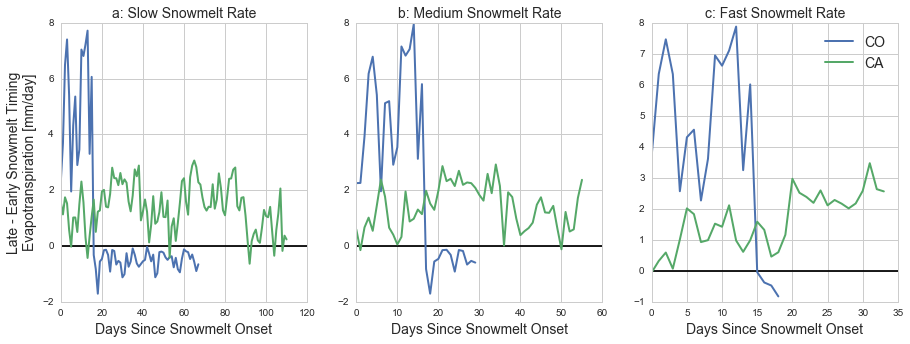

In [21]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

axes = [ax1,ax2,ax3]

for ax,speed,title in zip(axes,speeds,titles):
    ax.set_title(title,fontsize=14)
    ax.axhline(0,color='k')
    for df,site in zip(speed,sites):
        ax.plot(df.index,df['diff'],label = site,lw=lw)
        ax.set_xlabel('Days Since Snowmelt Onset', fontsize=14)

ax1.set_ylabel('Late - Early Snowmelt Timing\nEvapotranspiration [mm/day]', fontsize=14)
plt.legend(fontsize=14)

plt.savefig('./figures/ETdifference_timeseries_v2.png',dpi=300,bbox_inches='tight')
plt.savefig('./figures/ETdifference_timeseries_v2.pdf',bbox_inches='tight')

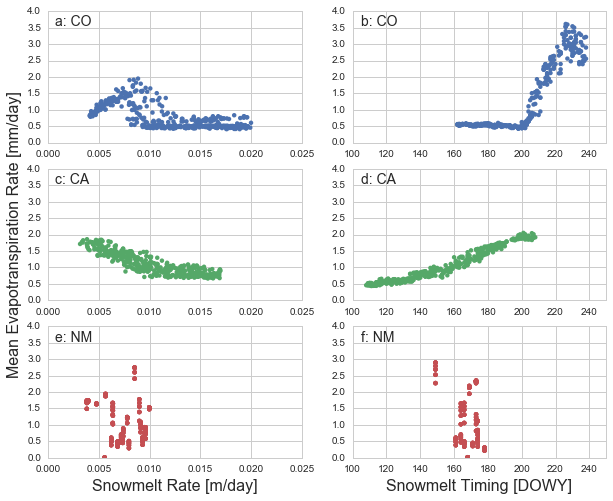

In [17]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

axes = [ax1,ax2,ax3,ax4,ax5,ax6]
smraxes = [ax1,ax3,ax5]
smtaxes = [ax2,ax4,ax6]

df = co
minval = 40
maxval = 60
peakswemax = np.percentile(df.PeakSWE,maxval)
peakswemin = np.percentile(df.PeakSWE,minval)
timingmax = np.percentile(df.TpeakSWE,maxval)
timingmin = np.percentile(df.TpeakSWE,minval)
smrmax = np.percentile(df.SMR,maxval)
smrmin = np.percentile(df.SMR,minval)
smr = df.loc[(df.PeakSWE<=peakswemax)&(df.PeakSWE>=peakswemin)&(df.TpeakSWE<=timingmax)&(df.TpeakSWE>=timingmin)]
smt = df.loc[(df.PeakSWE<=peakswemax)&(df.PeakSWE>=peakswemin)&(df.SMR<=smrmax)&(df.SMR>=smrmin)]

ax1.scatter(smr.SMR,smr.ETRate,s=20,c=co_color,edgecolors='None')
ax2.scatter(smt.TpeakSWE,smt.ETRate,s=20,c=co_color,edgecolors='None')

df = ca
minval = 40
maxval = 60
peakswemax = np.percentile(df.PeakSWE,maxval)
peakswemin = np.percentile(df.PeakSWE,minval)
timingmax = np.percentile(df.TpeakSWE,maxval)
timingmin = np.percentile(df.TpeakSWE,minval)
smrmax = np.percentile(df.SMR,maxval)
smrmin = np.percentile(df.SMR,minval)
smr = df.loc[(df.PeakSWE<=peakswemax)&(df.PeakSWE>=peakswemin)&(df.TpeakSWE<=timingmax)&(df.TpeakSWE>=timingmin)]
smt = df.loc[(df.PeakSWE<=peakswemax)&(df.PeakSWE>=peakswemin)&(df.SMR<=smrmax)&(df.SMR>=smrmin)]

ax3.scatter(smr.SMR,smr.ETRate,s=20,c=ca_color,edgecolors='None')
ax4.scatter(smt.TpeakSWE,smt.ETRate,s=20,c=ca_color,edgecolors='None')

df = nm
minval = 40
maxval = 60
peakswemax = np.nanpercentile(df.PeakSWE,maxval)
peakswemin = np.nanpercentile(df.PeakSWE,minval)
timingmax = np.nanpercentile(df.TpeakSWE,maxval)
timingmin = np.nanpercentile(df.TpeakSWE,minval)
smrmax = np.nanpercentile(df.SMR,maxval)
smrmin = np.nanpercentile(df.SMR,minval)
smr = df.loc[(df.PeakSWE<=peakswemax)&(df.PeakSWE>=peakswemin)&(df.TpeakSWE<=timingmax)&(df.TpeakSWE>=timingmin)]
smt = df.loc[(df.PeakSWE<=peakswemax)&(df.PeakSWE>=peakswemin)&(df.SMR<=smrmax)&(df.SMR>=smrmin)]

ax5.scatter(smr.SMR,smr.ETRate,s=20,c=nm_color,edgecolors='None')
ax6.scatter(smt.TpeakSWE,smt.ETRate,s=20,c=nm_color,edgecolors='None')

[ax.set_ylim(0,4) for ax in axes]
[ax.set_xlim(0,0.025) for ax in smraxes]
[ax.set_xlim(100,250) for ax in smtaxes]
ax5.set_xlabel('Snowmelt Rate [m/day]',fontsize=16)
ax6.set_xlabel('Snowmelt Timing [DOWY]',fontsize=16)
ax3.set_ylabel('Mean Evapotranspiration Rate [mm/day]', fontsize=16)
ax1.text(0.0007,3.55,'a: CO',fontsize=14)
ax3.text(0.0007,3.55,'c: CA',fontsize=14)
ax5.text(0.0007,3.55,'e: NM',fontsize=14)

ax2.text(105,3.55,'b: CO',fontsize=14)
ax4.text(105,3.55,'d: CA',fontsize=14)
ax6.text(105,3.55,'f: NM',fontsize=14)

#plt.savefig('./figures/meanETrate_SMR_SMT.png',dpi=300,bbox_inches='tight')
#plt.savefig('./figures/meanETrate_SMR_SMT.pdf',bbox_inches='tight')